# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Part 1

In [2]:
def ideal_filter(img, D_thresh=50):
    row, col = img.shape[0], img.shape[1]
    x, y = np.meshgrid(np.linspace(0,row-1,row), np.linspace(0,col-1,col))
    D = np.sqrt((y-row/2)**2 + (x-col/2)**2)
    H = np.where(D>D_thresh, 0, 1)
    return H

In [3]:
def butterworth_filter(img, order=6, D_thresh=50):
    row, col = img.shape[0], img.shape[1]
    x, y = np.meshgrid(np.linspace(0,row-1,row), np.linspace(0,col-1,col))
    D = np.sqrt((y-row/2)**2 + (x-col/2)**2)
    H = 1/(1+np.power((D/D_thresh), 2*order))
    return H

In [4]:
def gaussian_filter(img, D_thresh=50):
    row, col = img.shape[0], img.shape[1]
    x, y = np.meshgrid(np.linspace(0,row-1,row), np.linspace(0,col-1,col))
    D = np.sqrt((y-row/2)**2 + (x-col/2)**2)
    H = np.exp(-np.power(D,2)/(2*np.power(D_thresh,2)))
    return H

In [5]:
def apply_filter(img, filt):
    fft_img = np.fft.fftshift(np.fft.fft2(img))
    filter_img = np.abs(np.fft.ifft2(np.fft.ifftshift(np.multiply(filt, fft_img))))
    return filter_img

In [6]:
root = './DIP_2019_A3/'

In [7]:
img = cv2.imread(root+'lena.jpg', cv2.IMREAD_GRAYSCALE)

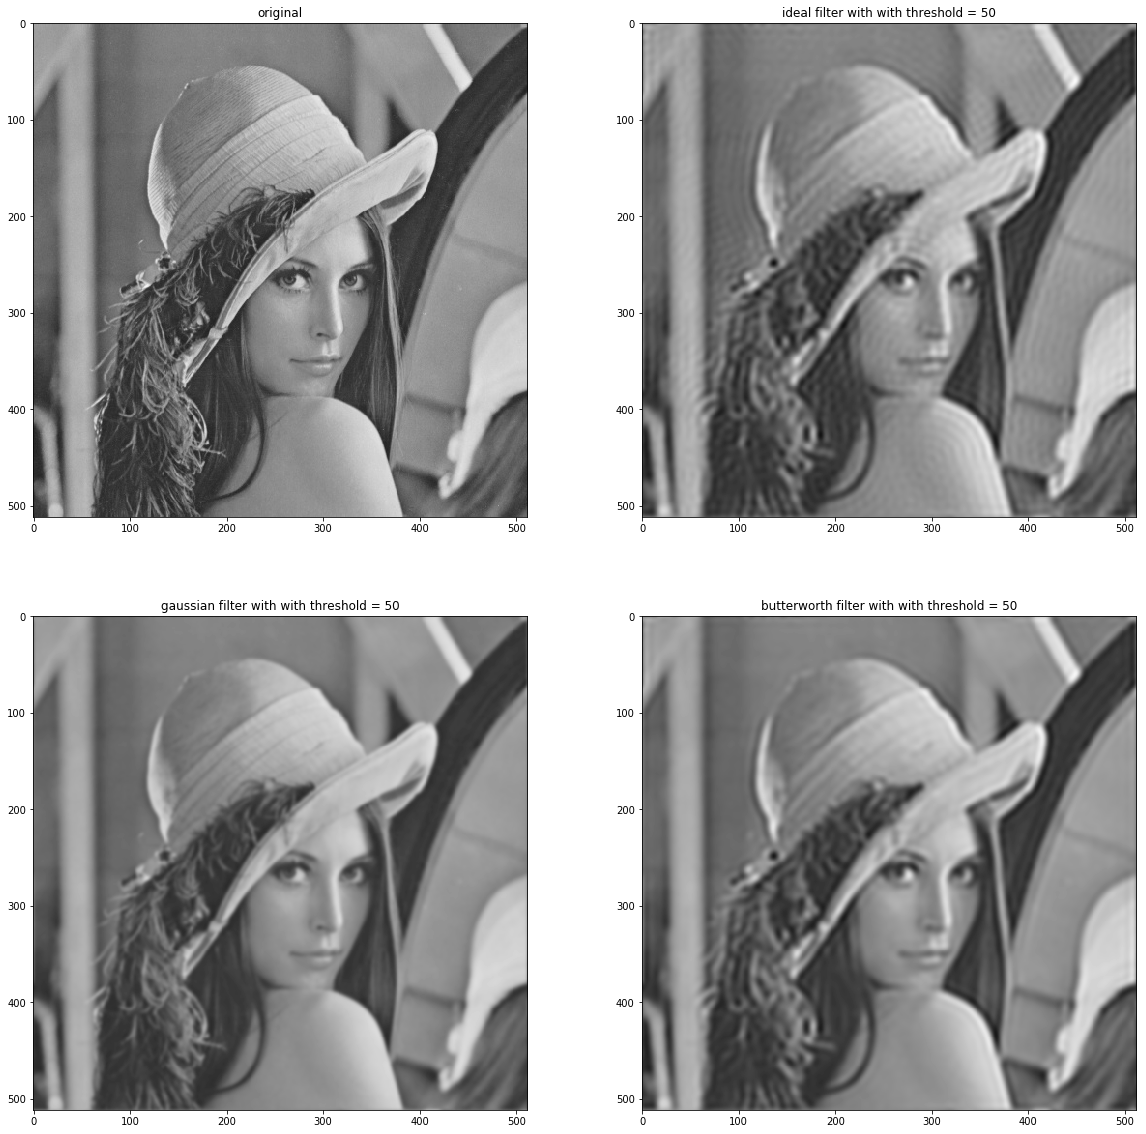

In [8]:
f = ideal_filter(img)
f2 = butterworth_filter(img)
f3 = gaussian_filter(img)
out1 = apply_filter(img, f)
out2 = apply_filter(img, f2)
out3 = apply_filter(img, f3)

_,plots = plt.subplots(2,2,figsize=(20,20))
plots[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)
plots[0][0].set_title('original')
plots[0][1].imshow(out1, cmap='gray', vmin=0, vmax=255)
plots[0][1].set_title('ideal filter with with threshold = 50')
plots[1][0].imshow(out3, cmap='gray', vmin=0, vmax=255)
plots[1][0].set_title('gaussian filter with with threshold = 50')
plots[1][1].imshow(out2, cmap='gray', vmin=0, vmax=255)
plots[1][1].set_title('butterworth filter with with threshold = 50')

plt.show()


### Part 2

In [9]:
img = cv2.imread(root+'lena.jpg', cv2.IMREAD_GRAYSCALE)

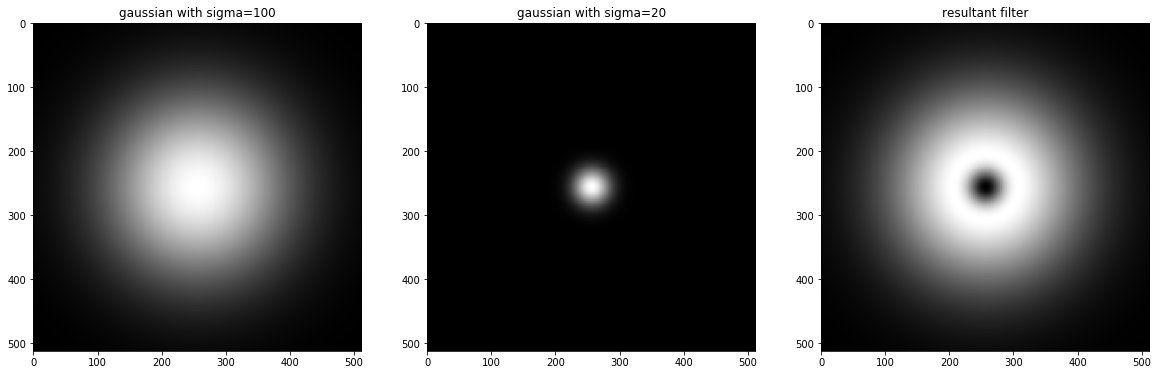

In [10]:
filt100 = gaussian_filter(img,100)
filt20 = gaussian_filter(img, 20)
_,plts = plt.subplots(1,3, figsize=(20,20))
plts[0].imshow(filt100, cmap='gray')
plts[0].set_title('gaussian with sigma=100')
plts[1].imshow(filt20, cmap='gray')
plts[1].set_title('gaussian with sigma=20')
plts[2].imshow(filt100-filt20, cmap='gray')
plts[2].set_title('resultant filter')
plt.show()

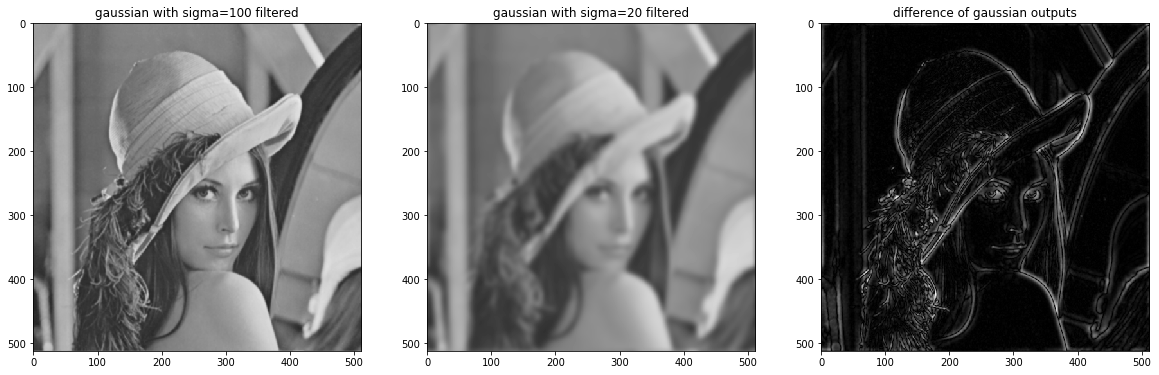

In [11]:
out1 = apply_filter(img, filt100)
out2 = apply_filter(img, filt20)
_,plots = plt.subplots(1,3, figsize=(20,20))
plots[0].imshow(out1, cmap='gray', vmin=0, vmax=255)
plots[0].set_title('gaussian with sigma=100 filtered')
plots[1].imshow(out2, cmap='gray', vmin=0, vmax=255)
plots[1].set_title('gaussian with sigma=20 filtered')
plots[2].imshow(np.abs(out1-out2), cmap='gray')
plots[2].set_title('difference of gaussian outputs')

plt.show()

#### Observations:

- When subtracting two gaussian filters(low pass)
with different sigma, a band pass filter is formed